In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
((train_images,train_labels),(test_images,test_labels)) = fashion_mnist.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
train_images[0,23,23]

194

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

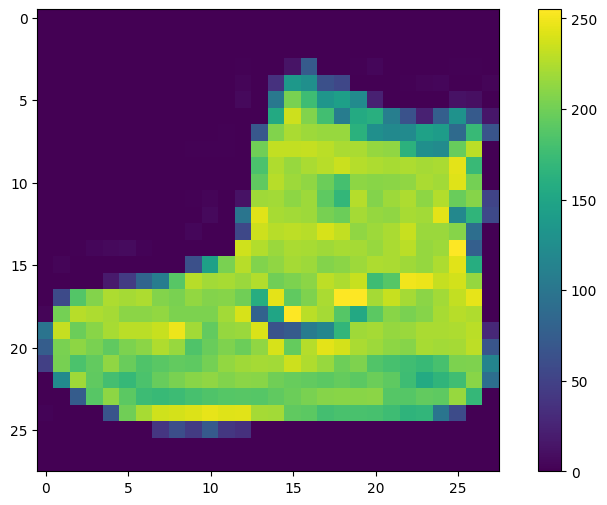

In [8]:
plt.figure(figsize=(10,6))
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

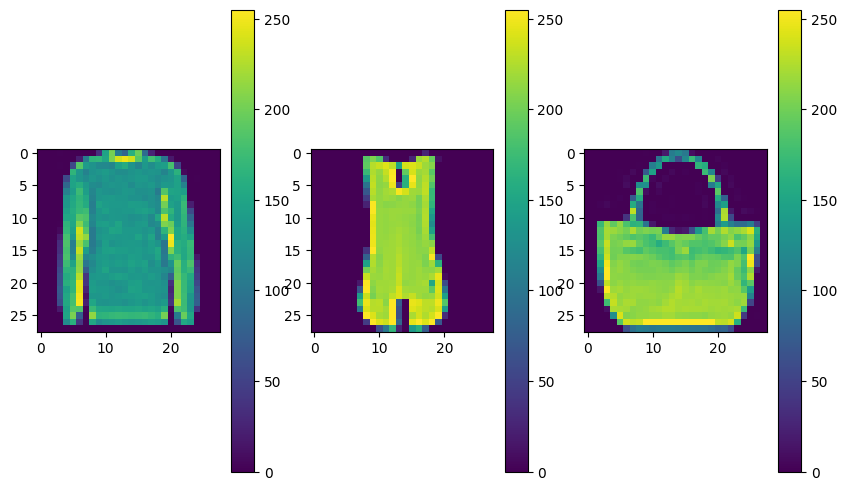

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow(train_images[45])
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(train_images[4])
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(train_images[100])
plt.colorbar()

plt.show()

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  #input layer
    keras.layers.Dense(128,activation='relu'), #hidden layer
    keras.layers.Dense(10,activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_images,train_labels,epochs=20)




Epoch 1/20


1875/1875 [==============================] - 3s 1ms/step - loss: 0.5002 - accuracy: 0.8237
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3776 - accuracy: 0.8642
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3358 - accuracy: 0.8788
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3125 - accuracy: 0.8855
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2933 - accuracy: 0.8920
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2793 - accuracy: 0.8976
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9018
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2551 - accuracy: 0.9042
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2466 - accuracy: 0.9087
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0

In [12]:
loss,accuracy=model.evaluate(test_images,test_labels)
print(f"The accuracy is {accuracy}")

313/313 [==============================] - 0s 863us/step - loss: 0.3548 - accuracy: 0.8894
The accuracy is 0.8894000053405762


In [13]:
prediction = model.predict(test_images)
print(prediction[0])
print(np.argmax(prediction[0]))

313/313 [==============================] - 0s 843us/step
[1.9083530e-14 3.4326630e-13 5.2990220e-15 2.3708557e-14 7.0815654e-14
 7.9592820e-07 8.2067836e-15 2.4151092e-03 4.1734580e-15 9.9758410e-01]
9


Ankle boot


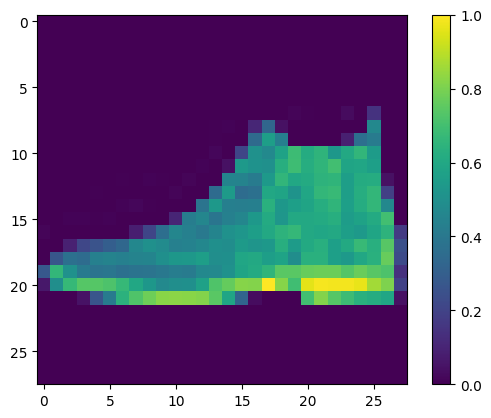

In [14]:
print(class_names[np.argmax(prediction[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

1/1 [==============================] - 0s 10ms/step


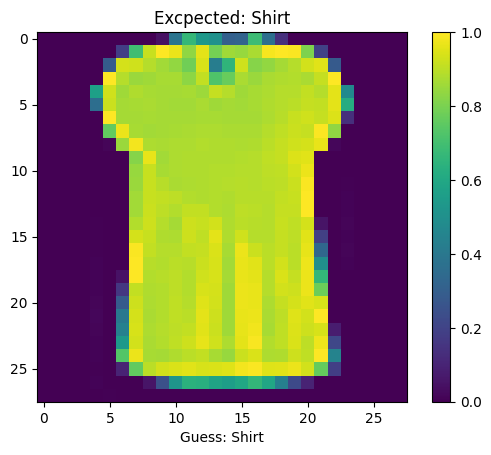

In [26]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
